## Twitter analysis

I have used Twitter's streaming API to gather a corpus of approximately 75k public tweets that occurred in a two-week period immediately before the 2012 presidential election. All tweets are related to either Barack Obama or Mitt Romney.
We want to find out if there are differences in the texts of tweets related to Obama compared with the texts of tweets related to Romney. Do people choose different words in these different contexts? Are people more negative when discussing one candidate compared with the other?
Processing natural language programmatically is extremely challenging, so we'll focus here on a word frequency analysis.

Each tweet dict provides a lot of data. For our purposes here, you will only need to use two keys: "created_at" and "text":

**tweet["created_at"]** is a string storing the timestamp for when the tweet was written. You will need to parse this using time, datetime, etc. Be sure to consult the docs on timestamp format strings. We discussed timestamps in Lecture 3.

**tweet["text"]** stores the text of the tweet itself.

It may take several hundred MBs of RAM to load all tweets into memory at the same time. You may have more luck loading each tweet one at a time and then keeping just the "created_at" and "text" data.

In [336]:
# load in necessary packages
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import gzip
import re
from datetime import datetime as datetime

In [337]:
# list the current directory to make sure we're in the correct one
print(os.getcwd())
# make sure we're in the correct directory
os.chdir("/Users/Looi/Google Drive/UVM/Classes/Fall 2017/Data_Science_I/HW03")
# list the current files in the directory
os.listdir()

/Users/Looi/Google Drive/UVM/Classes/Fall 2017/Data_Science_I/HW03


['.ipynb_checkpoints',
 'Daily_CandidateTweets.png',
 'Hourly_CandidateTweets.png',
 'HourlyTweetsHW03.png',
 'HW03_Alexander.Looi.ipynb',
 'HW03_instructions.html',
 'HW03_twitterData.json.txt.gz',
 'OR_slantedwords.txt']

In [338]:
# create lists to house the raw tweet data
time_stamp = []
tweet_time = []
text_tweet = []
# read in the data and grab only the time stamps, and text of the tweet
for line in gzip.open("HW03_twitterData.json.txt.gz", 'rt', encoding='utf-8'):
    tweet = json.loads(line.strip())
    time_stamp.append(tweet['created_at'])
    # convert all strings to lowercase
    text_tweet.append(tweet['text'].lower())
    #print(tweet['created_at'].split()[1:])
    # parse the time of a tweet
    tweet_time.append(datetime.strptime(' '.join(tweet['created_at'].split()[1:]), '%d %b %Y %H:%M:%S'))


In [340]:
# check to see that these the number of tweets and time stamps are the same length
print(len(time_stamp))
print(len(text_tweet))
# look at a couple of tweets and timestamps so that we can look at how to parse data.
print(text_tweet[1:5])
print(time_stamp[1:5])

76575
76575
['@barackobama @mittromney @paulryanvp http://t.co/da9q7rgj', '@barackobama our economy did not get into this recession in just a few years leading to his presidency', '"vote for love of country, not revenge" @mittromney', 'making phone calls for @repchipcravaack @mittromney and @paulryanvp on my 21st birthday. can i get a rt? #tcot #mncrs #gop']
['Thu, 25 Oct 2012 11:54:12', 'Wed, 24 Oct 2012 23:59:43', 'Sun, 04 Nov 2012 07:47:22', 'Thu, 01 Nov 2012 09:45:15']


Now I need to find all the tweets that mention either Mitt Romney or Barack Obama while still keeping in mind if they use alternative ways of mentioning either presidential candidate.

Names for Mitt Romney:
    - Mitt, Romney, Mitt Romney, Rmoney, (Mittens?), MittRomney, Mitt_Romney, MRomney, M_Romney 

Names for Barrack Obama:
    - Barry, Barry Obama, Obama, Barrack (Barrack Hussein Obama), BarackObama, Barack_Obama, barry_obama, b_obama, bama, 0b4m4  

In [341]:
# create the search words that we want to associate with a tweet about Romney or Obama
r_refs = ["mitt", "romney", "mittromney", "mitt_romney", "mromney", "m_romney"]
b_refs = ["Barry", "obama", "barrack", "barack", "barackobama", "barack_obama", "barry_obama", "b_obama", "bama", "0b4m4"]

In [356]:
# testing some parsing algorithms

# Strip off all numbers and symbols (will remove "leet speak" and emojis hashtags etc.)
text_test = [re.sub(r'\W+', '', w) for w in text_tweet[1].split()]
# match with some form of romney or Obama
# Note: Barry may result in false positive.
b_matches = set(text_test).intersection(b_refs)
r_matches = set(text_test).intersection(r_refs)
#print(text_test)
#print(b_matches)
#print(r_matches)
#print(time_stamp[1])

# parse out the date and time modules
#datetime_object = datetime.datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

#tweet_time = datetime.strptime(' '.join(time_stamp[1].split()[1:]), '%d %b %Y %I:%M:%S')

# print out the newly formated tweet to see if it worked
#print(tweet_time)

[datetime.datetime(2012, 11, 2, 19, 59, 51), datetime.datetime(2012, 10, 25, 11, 54, 12), datetime.datetime(2012, 10, 24, 23, 59, 43), datetime.datetime(2012, 11, 4, 7, 47, 22), datetime.datetime(2012, 11, 1, 9, 45, 15), datetime.datetime(2012, 11, 6, 20, 59, 57), datetime.datetime(2012, 11, 3, 22, 58, 28), datetime.datetime(2012, 11, 7, 15, 59, 50), datetime.datetime(2012, 11, 6, 13, 59, 31), datetime.datetime(2012, 11, 3, 7, 56, 54), datetime.datetime(2012, 10, 25, 2, 59, 32), datetime.datetime(2012, 10, 27, 20, 59, 33), datetime.datetime(2012, 11, 2, 7, 52, 45), datetime.datetime(2012, 11, 5, 21, 59, 52), datetime.datetime(2012, 11, 4, 0, 59, 34), datetime.datetime(2012, 11, 4, 8, 57, 7), datetime.datetime(2012, 11, 6, 18, 59, 32), datetime.datetime(2012, 11, 2, 7, 58, 43), datetime.datetime(2012, 10, 27, 19, 59, 24), datetime.datetime(2012, 11, 2, 23, 59, 38), datetime.datetime(2012, 11, 6, 13, 59, 57), datetime.datetime(2012, 11, 5, 6, 57, 44), datetime.datetime(2012, 10, 24, 7, 5

In [342]:
# implement my parsing algorithm here

# a dictionary indicating which candidate a tweet is about
# Obama, Romney or Both

# May want to create a dictionary within each dictionary entry to track individual uses of his name.
# need to also parse the time stamps for each tweet.
cand_2_tweet = {}
obama = {}
romney = {}
both = {}

# getting a tweet and the time it was written.
for tt, t in zip(tweet_time, text_tweet):
    # Strip off all numbers and symbols (will remove "leet speak", emojis, hashtags etc.)
    twt_text = [re.sub(r'\W+', '', w) for w in t.split()]
    b_matches = set(twt_text).intersection(b_refs)
    r_matches = set(twt_text).intersection(r_refs)
    # Find all tweets JUST about Obama
    if len(b_matches) >= 1 and len(r_matches) == 0:
        try:
            obama['tweets'].append(t)
            obama['time'].append(tt)
        except KeyError:
            obama['tweets'] = [t]
            obama['time'] = [tt]
    # Find all tweets JUST about Romney
    if len(r_matches) >= 1 and len(b_matches) == 0:
        try:
            romney['tweets'].append(t)
            romney['time'].append(tt)
        except KeyError:
            romney['tweets'] = [t]
            romney['time'] = [tt]
            
    # Find tweets about both candidates
    if len(r_matches) >= 1 and len(b_matches) >= 1:
        try:
            both['tweets'].append(t)
            both['time'].append(tt)
        except KeyError:
            both['tweets'] = [t]
            both['time'] = [tt]
            
# create a dictionary with obama, romney and both tweets.
cand_2_tweet['obama'] = obama
cand_2_tweet['romney'] = romney
cand_2_tweet['both'] = both

In [343]:
# function to parse the tweets of the two candidates.
def tweet_parse(tweet_time, Tweet_text, Reffs):
    # create a dictionary
    tweet_dict = {}
    for tt, t in zip(tweet_time, text_tweet):
        twt_text = [re.sub(r'\W+', '', w) for w in t.split()]
        b_matches = set(twt_text).intersection(Reffs)
        # Find all tweets JUST about a particular candidate.
        if len(b_matches) >= 1:
            try:
                tweet_dict['tweets'].append(t)
                tweet_dict['time'].append(tt)
            except KeyError:
                tweet_dict['tweets'] = [t]
                tweet_dict['time'] = [tt]
                
    return tweet_dict

In [2]:
import datetime as dt
import time

# To plot a time series of the tweet data by
# trying to convert to epoch be able to create 
# a arange array

first = int(np.min(tweet_time).strftime('%s'))
last = int(np.max(tweet_time).strftime('%s'))

# create an evenly spaced time frame and bin the times

numtimes = 60*60*24 # daily interval
epoch_ran = np.arange(first, last, numtimes)

# change the epochs back to time object
date_ran = [time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(t)) for t in epoch_ran]

NameError: name 'np' is not defined

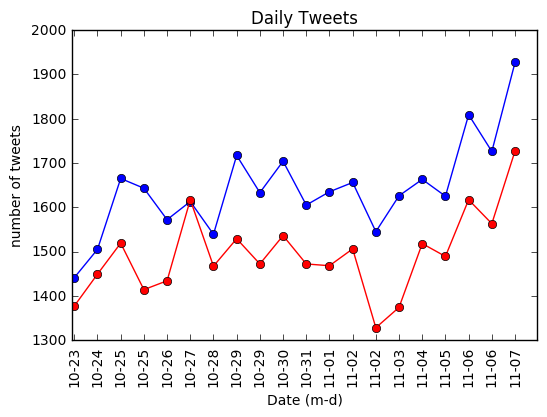

In [345]:
# plot daily tweets
obama_e = [int(t.strftime('%s')) for t in obama['time']]
romney_e = [int(t.strftime('%s')) for t in romney['time']]

ocnts, obins, obars = plt.hist(obama_e, 20)
rcnts, rbins, rbars = plt.hist(romney_e, 20)
plt.clf()

obin_centers = (obins[:-1] + obins[1:])/2.
rbin_centers = (rbins[:-1] + rbins[1:])/2.

odates = [time.strftime('%m-%d', time.localtime(t)) for t in obin_centers]
rdates = [time.strftime('%m-%d', time.localtime(t)) for t in rbin_centers]

plt.plot(obin_centers, ocnts, 'o-', color = "b")
plt.plot(rbin_centers, rcnts, 'o-', color = "r")

plt.xticks(obin_centers, odates, rotation='vertical')
plt.xlabel("Date (m-d)")
plt.ylabel("number of tweets")
plt.title("Daily Tweets")
plt.savefig("Daily_CandidateTweets.png")
plt.show()


In [346]:
# Strip the minutes off the times.
obama_h = [t.strftime('%Y-%m-%d %H')+":00:00" for t in obama['time']]
romney_h = [t.strftime('%Y-%m-%d %H')+":00:00" for t in romney['time']]

obama_h = [datetime.strptime(t, '%Y-%m-%d %H:%M:%S') for t in obama_h]
romney_h = [datetime.strptime(t, '%Y-%m-%d %H:%M:%S') for t in romney_h]

obama_h = [int(t.strftime('%s')) for t in obama_h]
romney_h = [int(t.strftime('%s')) for t in romney_h]

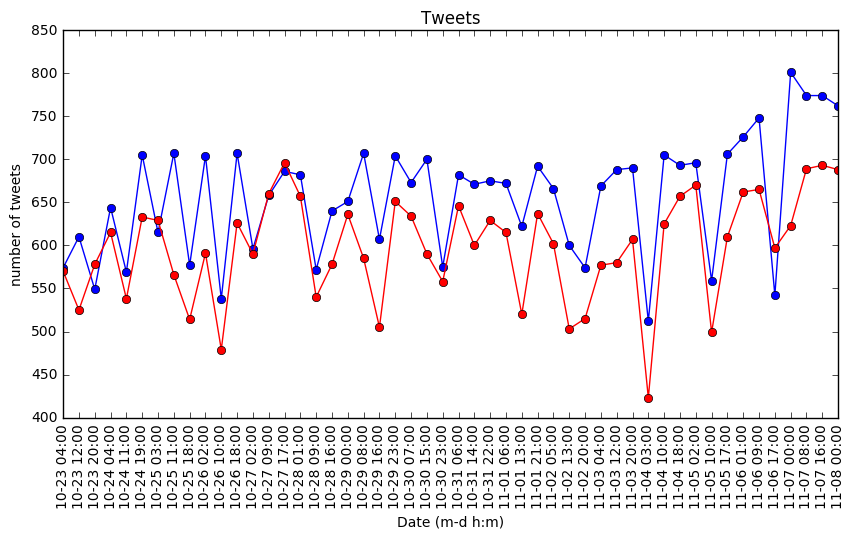

In [347]:
# plot tweets that are only aggregated to the hour.
bin_num = 50

# get the heights and x values of a histogram of the data.
ocnts, obins, obars = plt.hist(obama_h, bin_num)
rcnts, rbins, rbars = plt.hist(romney_h, bin_num)
plt.clf()
# set the figure size so that the x-labels don't overlap
plt.figure(figsize=(10,5))
# calculate the center of the of where the histogram bars would be.
obin_centers = (obins[:-1] + obins[1:])/2.0
rbin_centers = (rbins[:-1] + rbins[1:])/2.0

# Create x-labels that should month, day, hour and min.
odates = [time.strftime('%m-%d %H', time.localtime(t))+':00' for t in obin_centers]
rdates = [time.strftime('%m-%d %H', time.localtime(t))+':00' for t in rbin_centers]

plt.plot(obin_centers, ocnts, 'o-', color = "b")
plt.plot(rbin_centers, rcnts, 'o-', color = "r")

plt.xticks(obin_centers, odates, rotation='vertical')
plt.xlabel("Date (m-d h:m)")
plt.ylabel("number of tweets")
plt.title("Tweets")
plt.xlim(obin_centers[0], obin_centers[-1])
plt.savefig("Hourly_CandidateTweets.png", pad_inches=0.1)
plt.show()

In [348]:
# Note: these corpus only include tweets that mention a single candidates. 
# So tweets mentioning both candidates are excluded.

# Create the corpus (dictionary) of words for each candidate
obama_corp = {}
romney_corp = {}

# count the number of occurances of each word in Obama tweets
for t in obama['tweets']:
    twt_text = [re.sub(r'\W+', '', w) for w in t.split()]
    for w in twt_text:
        try:
            obama_corp[w] += 1
        except KeyError:
            obama_corp[w] = 1

# count the number of occurances of each word in Romney tweets
for t in romney['tweets']:
    twt_text = [re.sub(r'\W+', '', w) for w in t.split()]
    for w in twt_text:
        try:
            romney_corp[w] += 1
        except KeyError:
            romney_corp[w] = 1

In [349]:
# calculate CW values for the obama Corpus and put into dictionary
obama_cw = {}
for k in obama_corp.keys():
    # loop through all obama words
    f_o = obama_corp[k]
    
    try:
        f_r = romney_corp[k]
        numer = f_o-f_r
        denom = f_o+f_r
        obama_cw[k] = numer/denom
    except KeyError:
        pass

In [350]:
# calculate CW values for the romney Corpus and put into dictionary
romney_cw = {}
for k in romney_corp.keys():
    # loop through all romney words
    f_r = romney_corp[k]
    
    try:
        f_o = obama_corp[k]
        numer = f_o-f_r
        denom = f_o+f_r    
        romney_cw[k] = numer/denom
    except KeyError:
        pass

In [351]:
import enchant # use the enchant library to check if an element in the corpus is a word
import re # use regex to find numbers and symbols that should be removed
# remove dictionary entries that are not words
# ie web urls, leet speek, etc.
# note: hashtags with combined words and underscores will be removed.
d = enchant.Dict("en_US")
obama_keys = list(obama_cw.items())
romney_keys = list(romney_cw.items())
# remove dictionary entries that are not words
for k in obama_keys:
    # remove numbers from the word    
    word_check = re.sub(r'[0-9]+', '', k[0])
    try:
        if d.check(word_check) == False or any(c.isdigit() for c in k[0]):
            del obama_cw[k[0]]
    except ValueError:
        del obama_cw[k[0]]

        
for k in romney_keys:
    # remove numbers from the word
    word_check = re.sub(r'[0-9]+', '',k[0])
    
    try:
        if d.check(word_check) == False or any(c.isdigit() for c in k[0]):
            del romney_cw[k[0]]
    except ValueError:
        del romney_cw[k[0]]

In [352]:
# check to see if the calculations worked and only real english words remain
romney_cw
# now order the romney cw values from smallest to largest
rcw_val = []
r_words = []
for w in romney_cw.keys():
    rcw_val.append(romney_cw[w])
    r_words.append(w)

sort_RW = sorted(list(zip(rcw_val, r_words)))

In [353]:
# now order the romney cw values from smallest to largest
ocw_val = []
o_words = []
for w in obama_cw.keys():
    ocw_val.append(obama_cw[w])
    o_words.append(w)

sort_OW = sorted(list(zip(ocw_val, o_words)), reverse = True)

In [317]:
# check the Obama yule constants
#sort_OW

In [316]:
# check the Romney yule constants
#sort_RW

In [355]:
# print to a text file the largest Obama Yule Constants and the lowest Romney Yule Constants
out_txt = open("OR_slantedwords.txt", 'w')

print('Obama Word'.ljust(15), 'Yule Coef.'.ljust(15), 'Romney Word'.ljust(15), 'Yule Coef.'.ljust(15), file = out_txt)
print('-'*60, file = out_txt)
for n in np.arange(0,101):
    print(sort_OW[n][1].ljust(15), '{:6.5f}'.format(sort_OW[n][0]).ljust(15), sort_RW[n][1].ljust(15), '{:6.5f}'.format(sort_RW[n][0]).ljust(15), file = out_txt)
    
out_txt.close()

In [354]:
# Print to the console

print('Obama Word'.ljust(15), 'Yule Coef.'.ljust(15), 'Romney Word'.ljust(15), 'Yule Coef.'.ljust(15))
print('-'*60)
for n in np.arange(0,101):
    print(sort_OW[n][1].ljust(15), '{:6.5f}'.format(sort_OW[n][0]).ljust(15), sort_RW[n][1].ljust(15), '{:6.5f}'.format(sort_RW[n][0]).ljust(15))

Obama Word      Yule Coef.      Romney Word     Yule Coef.     
------------------------------------------------------------
confirm         0.98374         basic           -0.98827       
champion        0.98230         reflect         -0.98571       
instructions    0.97895         canned          -0.98473       
reelect         0.97818         freed           -0.98374       
submit          0.97333         stale           -0.97917       
z               0.97297         jeep            -0.97727       
singlehandedly  0.97183         qualities       -0.97351       
expertise       0.96970         considering     -0.97143       
impeach         0.96721         couples         -0.97122       
highlights      0.96667         remembered      -0.96923       
casino          0.96610         dictators       -0.96850       
jay             0.96078         defiance        -0.96610       
reelecting      0.96000         delivering      -0.96552       
impeached       0.95294         bigot      

The Yule Coef. regularizes the relative word counts between corpuses. However, It seems that there are consistently more tweets about Obama compared to Romney. This may skew word counts of certain words in Obama's favor. We may want to regularize the word counts within each corpus additionally so compare proportional occurances of words between the corpuses. 

Between the two corpuses the Obama "heavy" words and the Romney "heavy" words make sense. Words like "Basketball", "strikes", and "impeach" are particular to Obama as a sitting president who likes to play basketball. Only a sitting president can be impeached or order strikes. A lot of naughty words relating to women appear in the most Romney slanted words which may be a result of his "binders full of women comment".

Some words don't seem like they should be heavily associated with one candidate over another such as "confirm" or "grabbing" for Obama. Nor does some words associated with Romney such as "mustache" or "infomercial".